# **TikTok Project**
**Course 3 - Go Beyond the Numbers: Translate Data into Insights**

Your TikTok data team is still in the early stages of their latest project. So far, you’ve completed a project proposal and used Python to inspect and organize the TikTok dataset.

The management team asked to see a Python notebook showing data structuring and cleaning, as well as any matplotlib/seaborn visualizations plotted to help us understand the data. At the very least, include a graph comparing claim counts to opinion counts, as well as boxplots of the most important variables (like “video duration,” “video like count,” “video comment count,” and “video view count”) to check for outliers. Also, include a breakdown of “author ban status” counts.

Additionally, the management team has recently asked all EDA to include Tableau visualizations. Tableau visualizations are particularly helpful in status reports to the client and board members. For this data, create a Tableau dashboard showing a simple claims versus opinions count, as well as stacked bar charts of claims versus opinions for variables like video view counts, video like counts, video share counts, and video download counts. Make sure it is easy to understand to someone who isn’t data savvy, and remember that the assistant director is a person with visual impairments.

# **Course 3 End-of-course project: Exploratory data analysis**

In this activity, you will examine data provided and prepare it for analysis. You will also design a professional data visualization that tells a story, and will help data-driven decisions for business needs.
<br/>

**The purpose** of this project is to conduct exploratory data analysis on a provided data set. Your mission is to continue the investigation you began in C2 and perform further EDA on this data with the aim of learning more about the variables. Of particular interest is information related to what distinguishes claim videos from opinion videos.

**The goal** is to explore the dataset and create visualizations.
<br/>
*This activity has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
*   Data cleaning


**Part 3:** Build visualizations

**Part 4:** Evaluate and share results

# **Visualize a story in Tableau and Python**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document and those below where applicable to craft your response:
1. Identify any outliers:


*   What methods are best for identifying outliers?     

        Use numpy functions to investigate the `mean()` and `median()` of the data and understand range of data values
        Use a boxplot to visualize the distribution of the data
*   How do you make the decision to keep or exclude outliers from any future models?    

        There are three main options for dealing with outliers: keeping them as they are, deleting them, or reassigning them.   
        The decision which sstrategy to use based on dataset analysis, according to what your goals are for the model you are planning to construct.

        Delete outliers: If you are sure the outliers are mistakes, typos, or errors and the dataset will be used for modeling or machine learning, then you are more likely to decide to delete outliers. Of the three choices, you’ll use this one the least.         
        
        Reassign them: If the dataset is small and/or the data will be used for modeling or machine learning, you are more likely to choose a path of deriving new values to replace the outlier values.        

        Leave them: For a dataset that you plan to do EDA/analysis on and nothing else, or for a dataset you are preparing for a model that is resistant to outliers, it is most likely that you are going to leave them in.

### **Task 1. Imports, links, and loading**
Go to Tableau Public
The following link will help you complete this activity. Keep Tableau Public open as you proceed to the next steps.

Link to supporting materials:
Public Tableau: https://public.tableau.com/s/.

For EDA of the data, import the packages that would be most helpful, such as `pandas`, `numpy`, `matplotlib.pyplot`, and `seaborn`.


In [2]:
# Import packages for data manipulation
import pandas as pd
import numpy as np
import datetime as dt

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

Then, load the dataset into a dataframe. Read in the data and store it as a dataframe object.

In [3]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document and those below where applicable to complete your code.

### **Task 2a: Data exploration and cleaning**

The first step is to assess your data. Check the Data Source page on Tableau Public to get a sense of the size, shape and makeup of the data set.

Consider functions that help you understand and structure the data.

*    `.head()`
*    `.info()`
*    `.describe()`
*    `.groupby()`
*    `.sort_values()`

Consider the following questions as you work:

What do you do about missing data (if any)?

Are there data outliers?

Start by discovering, using `.head()`, `.size`, and `.shape`.

In [295]:
# Display and examine the first few rows of the dataframe
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [4]:
# Get the size of the data
data.size

232584

In [5]:
# Get the shape of the data
data.shape

(19382, 12)

Get basic information about the data, using `.info()`.

In [6]:
# Get basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate a table of descriptive statistics, using `.describe()`.

In [7]:
# Generate a table of descriptive statistics
data.describe(include="all")

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,19084,1.938200e+04,19382.000000,19084,19382,19382,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
unique,NaN,2,NaN,NaN,19012,2,3,NaN,NaN,NaN,NaN,NaN
top,NaN,claim,NaN,NaN,a friend read in the media a claim that badmi...,not verified,active,NaN,NaN,NaN,NaN,NaN
freq,NaN,9608,NaN,NaN,2,18142,15663,NaN,NaN,NaN,NaN,NaN
mean,9691.500000,NaN,5.627454e+09,32.421732,NaN,NaN,NaN,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,NaN,2.536440e+09,16.229967,NaN,NaN,NaN,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,NaN,1.234959e+09,5.000000,NaN,NaN,NaN,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,NaN,3.430417e+09,18.000000,NaN,NaN,NaN,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,NaN,5.618664e+09,32.000000,NaN,NaN,NaN,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,NaN,7.843960e+09,47.000000,NaN,NaN,NaN,504327.000000,125020.000000,18222.000000,1156.250000,292.000000


In [4]:
data.isnull().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

### **Task 2b. Assess data types**

In Tableau, staying on the data source page, double check the data types of the columns in the dataset. Refer to the dimensions and measures in Tableau.


### **Task 2c. Select visualization type(s)**

Select data visualization types that will help you understand and explain the data.

Now that you know which data columns you’ll use, it is time to decide which data visualization makes the most sense for EDA of the TikTok dataset. What type of data visualization(s) would be most helpful? Consider the distribution of the data.

* Line graph
* Bar chart
* Box plot
* Histogram
* Heat map
* Scatter plot
* A geographic map


For distribution the most helpfull historramm,    
for outliers - boxplot

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**

Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3. Build visualizations**

Now that you have assessed your data, it’s time to plot your visualization(s).

#### **video_duration_sec**

Create a box plot to examine the spread of values in the `video_duration_sec` column.

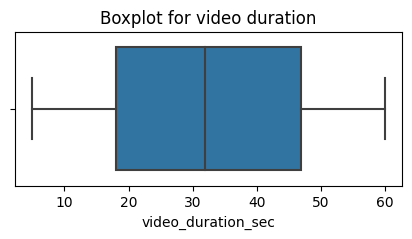

In [16]:
# Create a boxplot to visualize distribution of `video_duration_sec`
plt.figure(figsize=(5,2))
sns.boxplot(x=data["video_duration_sec"], showfliers=True)
plt.title("Boxplot for video duration");

Create a histogram of the values in the `video_duration_sec` column to further explore the distribution of this variable.

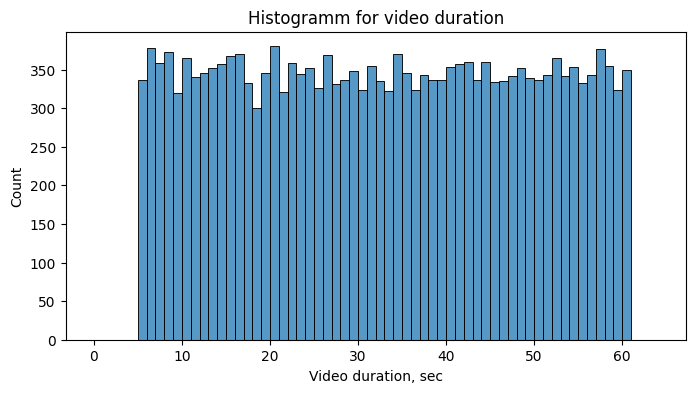

In [71]:
# Create a histogram
plt.figure(figsize=(8,4))
g = sns.histplot(data["video_duration_sec"], bins=range(0,65,1));
plt.xlabel("Video duration, sec")
plt.title("Histogramm for video duration");
plt.show();

**Question:** What do you notice about the duration and distribution of the videos?

    We have a uniform histogram  - a flat distribution, indicating that all data points are evenly distributed. Video duration has flat distribution, so data evenly distributed. Duration varies from 5 to 60 sec

#### **video_view_count**

Create a box plot to examine the spread of values in the `video_view_count` column.

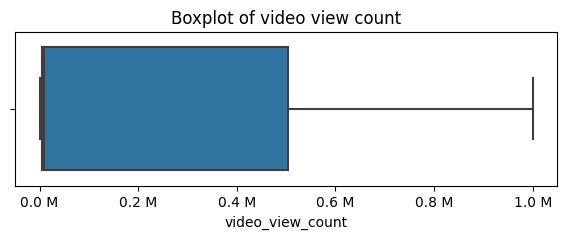

In [107]:
# Create a boxplot to visualize distribution of `video_view_count`
plt.figure(figsize=(7,2))
sns.boxplot(x=data["video_view_count"], showfliers=True)
labels = [str(i / 1000000) + " M" for i in range(0,1000001,200000)]
plt.xticks(range(0,1000001,200000), labels);
plt.title("Boxplot of video view count");

Create a histogram of the values in the `video_view_count` column to further explore the distribution of this variable.

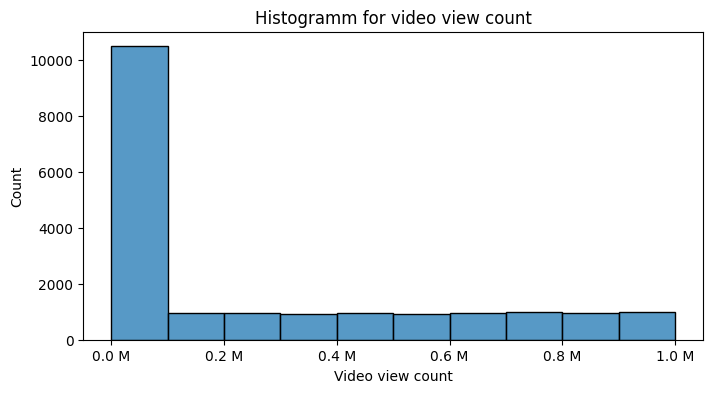

In [330]:
# Create a histogram
plt.figure(figsize=(8,4))
g = sns.histplot(data["video_view_count"], bins=range(0,1001000,100000));
labels = [str(i / 1000000) + " M" for i in range(0,1000001,200000)]
plt.xticks(range(0,1000001,200000), labels);
plt.xlabel("Video view count")
plt.title("Histogramm for video view count");
plt.show();

**Question:** What do you notice about the distribution of this variable?    

    This variable has a very uneven distribution.     
    More than half the videos receiving fewer than 100,000 views. Distribution of view counts > 100,000 views is uniform.

#### **video_like_count**

Create a box plot to examine the spread of values in the `video_like_count` column.

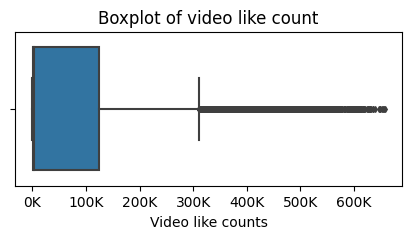

In [122]:
# Create a boxplot to visualize distribution of `video_like_count`
plt.figure(figsize=(5,2))
sns.boxplot(x=data["video_like_count"], fliersize=3)
labels = [str(i) + "K" for i in range(0,700,100)]
plt.xticks(range(0,700000,100000), labels)
plt.xlabel("Video like counts")
plt.title("Boxplot of video like count")
plt.show();

Create a histogram of the values in the `video_like_count` column to further explore the distribution of this variable.

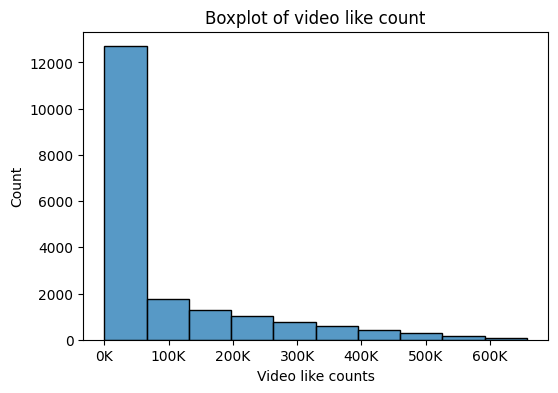

In [332]:
# Create a histogram
plt.figure(figsize=(6,4))
sns.histplot(data["video_like_count"], bins=10)
labels = [str(i) + "K" for i in range(0,700,100)]
plt.xticks(range(0,700000,100000), labels)
plt.xlabel("Video like counts")
plt.title("Boxplot of video like count")
plt.show();

**Question:** What do you notice about the distribution of this variable?    

    Similary like for "Video view count" lot of variable on the left side of the histogram. We have a right-skewed histogram, indicating that there are more data points on the left side of the histogram.

#### **video_comment_count**

Create a box plot to examine the spread of values in the `video_comment_count` column.

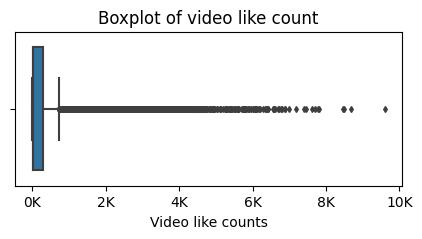

In [153]:
# Create a boxplot to visualize distribution of `video_comment_count`
plt.figure(figsize=(5,2))
sns.boxplot(x=data["video_comment_count"], fliersize=3)
labels = [str(i) + "K" for i in range(0,12,2)]
plt.xticks(range(0,12000,2000), labels)
plt.xlabel("Video like counts")
plt.title("Boxplot of video like count")
plt.show();

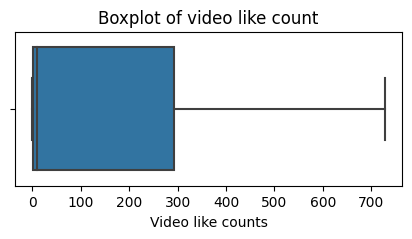

In [169]:
# Create a boxplot to visualize distribution of `video_comment_count`
plt.figure(figsize=(5,2))
sns.boxplot(x=data["video_comment_count"], showfliers=False)
plt.xlabel("Video like counts")
plt.title("Boxplot of video like count")
plt.show();

Create a histogram of the values in the `video_comment_count` column to further explore the distribution of this variable.

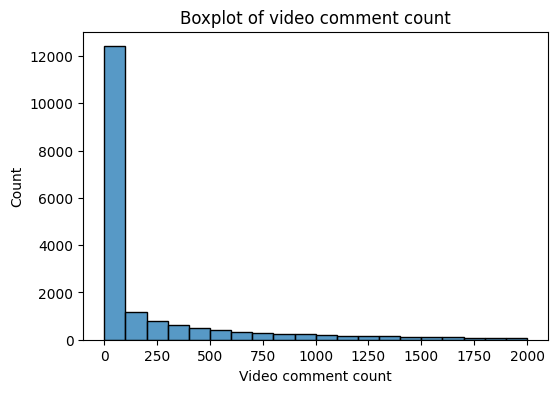

In [183]:
# Create a histogram
plt.figure(figsize=(6,4))
sns.histplot(data["video_comment_count"], bins=range(0,2001,100))
plt.xlabel("Video comment count")
plt.title("Boxplot of video comment count")
plt.show();


**Question:** What do you notice about the distribution of this variable?  

    We have a right-skewed histogram, indicating that there are more data points on the left side of the histogram.   
    The most number comments is up to 250 and after that the number of the comments decreasing rapidly

#### **video_share_count**

Create a box plot to examine the spread of values in the `video_share_count` column.

Text(0.5, 1.0, 'Boxplot of video share count')

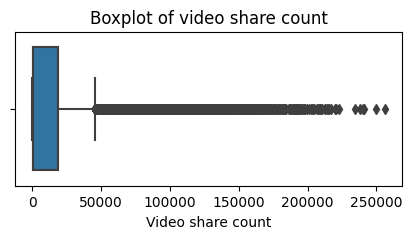

In [168]:
# Create a boxplot to visualize distribution of `video_share_count`
plt.figure(figsize=(5,2))
sns.boxplot(x=data["video_share_count"])
plt.xlabel("Video share count")
plt.title("Boxplot of video share count");

*Create* a histogram of the values in the `video_share_count` column to further explore the distribution of this variable.

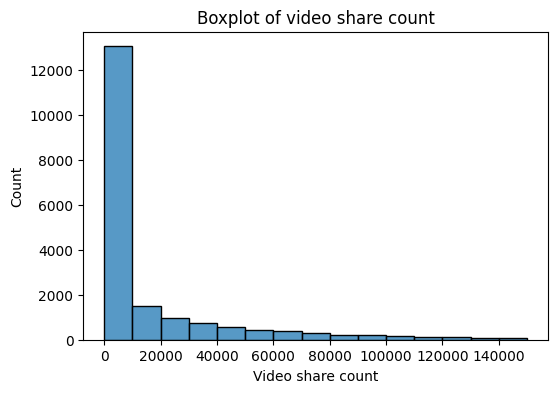

In [191]:
# Create a histogram
plt.figure(figsize=(6,4))
sns.histplot(data["video_share_count"], bins=range(0,150001,10000))
# labels = [str(i) + "K" for i in range(0,700,100)]
# plt.xticks(range(0,700000,100000), labels)
plt.xlabel("Video share count")
plt.title("Boxplot of video share count")
plt.show();

**Question:** What do you notice about the distribution of this variable?  

    We have a right-skewed histogram, indicating that there are more data points on the left side of the histogram.    
    The most amount of variables is less than 10,000 shares

#### **video_download_count**

Create a box plot to examine the spread of values in the `video_download_count` column.

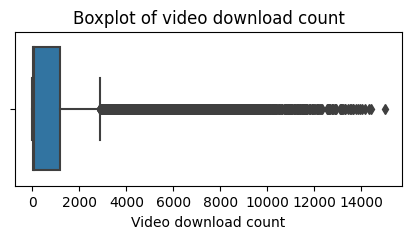

In [193]:
# Create a boxplot to visualize distribution of `video_download_count`
plt.figure(figsize=(5,2))
sns.boxplot(x=data["video_download_count"])
plt.xlabel("Video download count")
plt.title("Boxplot of video download count");
plt.show();

Create a histogram of the values in the `video_download_count` column to further explore the distribution of this variable.

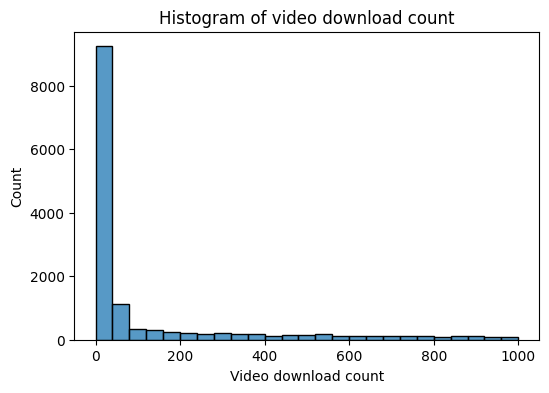

In [202]:
# Create a histogram
plt.figure(figsize=(6,4))
sns.histplot(data["video_download_count"], bins=range(0,1001,40))
plt.xlabel("Video download count")
plt.title("Histogram of video download count");

**Question:** What do you notice about the distribution of this variable?   

    We have a right-skewed histogram, indicating that there are more data points on the left side of the histogram.   

#### **Claim status by verification status**

Now, create a histogram with four bars: one for each combination of claim status and verification status.

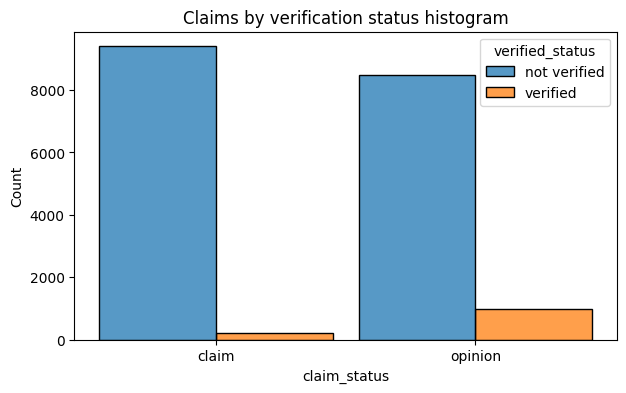

In [5]:
# 'Claims by verification status histogram'
plt.figure(figsize=(7,4))
sns.histplot(data=data,
             x='claim_status',
             hue='verified_status',
             multiple='dodge',
             shrink=0.9)
plt.title('Claims by verification status histogram');

**Question:** What do you notice about the number of verified users compared to unverified? And how does that affect their likelihood to post opinions?    

    Number of claims and opinion from verified users much less than from the unverified users

#### **Claim status by author ban status**

The previous course used a `groupby()` statement to examine the count of each claim status for each author ban status. Now, use a histogram to communicate the same information.

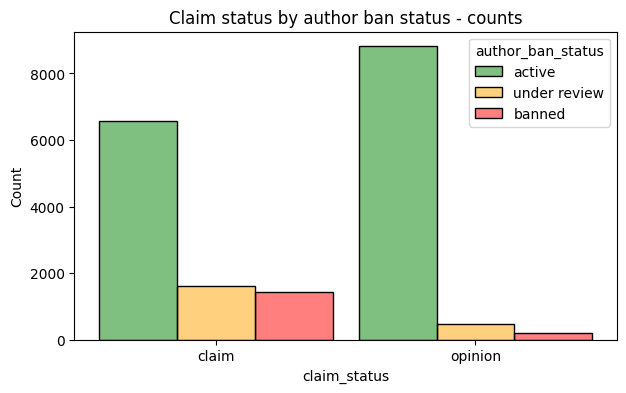

In [10]:
# Create a histogram Claim status by author ban status - counts
fig = plt.figure(figsize=(7,4))
sns.histplot(data, x='claim_status', hue='author_ban_status',
             multiple='dodge',
             hue_order=['active', 'under review', 'banned'],
             shrink=0.9,
             palette={'active':'green', 'under review':'orange', 'banned':'red'},
             alpha=0.5)
plt.title('Claim status by author ban status - counts');

**Question:** What do you notice about the number of active authors compared to banned authors for both claims and opinions?    

    Number of active authors much more than baned authors for both claims and opinions. It seems that authors who post claim videos are more likely to come under review and/or get banned.

#### **Median view counts by ban status**

Create a bar plot with three bars: one for each author ban status. The height of each bar should correspond with the median number of views for all videos with that author ban status.

In [337]:
data_to_plot_3 = data.groupby("author_ban_status")["video_view_count"].median().reset_index()
data_to_plot_3

,author_ban_status,video_view_count
0,active,8616.0
1,banned,448201.0
2,under review,365245.5


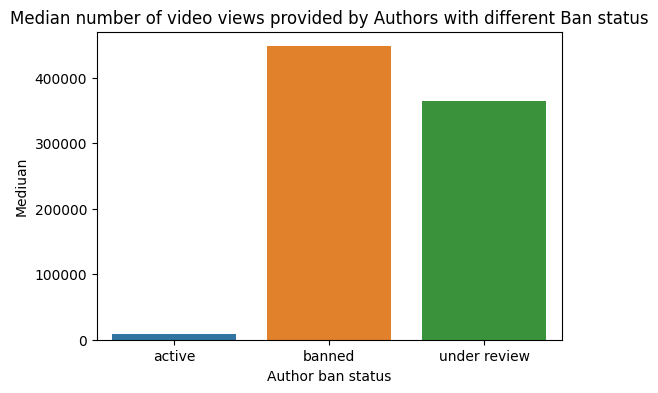

In [338]:
# Create a bar plot
plt.figure(figsize=(6,4))
sns.barplot(data_to_plot_3, x="author_ban_status", y="video_view_count");

plt.xlabel("Author ban status")
plt.ylabel("Mediuan")
plt.title("Median number of video views provided by Authors with different Ban status");

**Question:** What do you notice about the median view counts for non-active authors compared to that of active authors? Based on that insight, what variable might be a good indicator of claim status?    

    Median views of video from banned authors or under review authors are many times greater than from active users    
    Maibe number of video views will be good indicator of video in question

In [287]:
data_to_plot_4 = data.groupby("claim_status")["video_view_count"].median().reset_index()
data_to_plot_4

,claim_status,video_view_count
0,claim,501555.0
1,opinion,4953.0


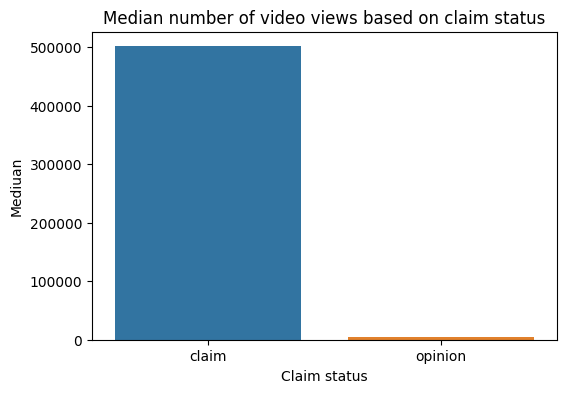

In [288]:
# Calculate the median view count for claim status.
plt.figure(figsize=(6,4))
sns.barplot(data_to_plot_4, x="claim_status", y="video_view_count");

plt.xlabel("Claim status")
plt.ylabel("Mediuan")
plt.title("Median number of video views based on claim status");

    Interesting, that video with claim status much more popular and have enormously more median views that video with opinion status

#### **Total views by claim status**

Create a pie graph that depicts the proportions of total views for claim videos and total views for opinion videos.

In [291]:
data_to_plot_5 = data.groupby("claim_status")["video_view_count"].sum().reset_index()
data_to_plot_5["percentage"] = data_to_plot_5["video_view_count"] / data_to_plot_5["video_view_count"].sum() *100
data_to_plot_5

,claim_status,video_view_count,percentage
0,claim,4.813891e+09,99.033768
1,opinion,4.696715e+07,0.966232


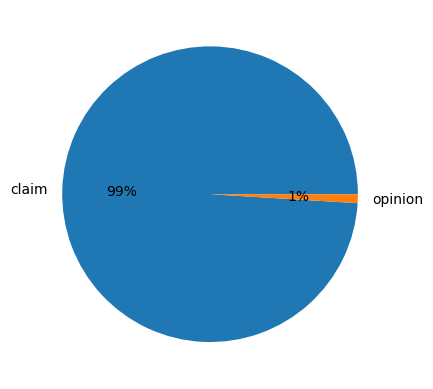

In [294]:
# Create a pie graph
plt.pie(data_to_plot_5["video_view_count"], labels=data_to_plot_5["claim_status"], autopct='%.0f%%');

**Question:** What do you notice about the overall view count for claim status?     

    Video with opinion status have significantly less views than the video with claim status

### **Task 4. Determine outliers**

When building predictive models, the presence of outliers can be problematic. For example, if you were trying to predict the view count of a particular video, videos with extremely high view counts might introduce bias to a model. Also, some outliers might indicate problems with how data was captured or recorded.

The ultimate objective of the TikTok project is to build a model that predicts whether a video is a claim or opinion. The analysis you've performed indicates that a video's engagement level is strongly correlated with its claim status. There's no reason to believe that any of the values in the TikTok data are erroneously captured, and they align with expectation of how social media works: a very small proportion of videos get super high engagement levels. That's the nature of viral content.

Nonetheless, it's good practice to get a sense of just how many of your data points could be considered outliers. The definition of an outlier can change based on the details of your project, and it helps to have domain expertise to decide a threshold. You've learned that a common way to determine outliers in a normal distribution is to calculate the interquartile range (IQR) and set a threshold that is 1.5 * IQR above the 3rd quartile.

In this TikTok dataset, the values for the count variables are not normally distributed. They are heavily skewed to the right. One way of modifying the outlier threshold is by calculating the **median** value for each variable and then adding 1.5 * IQR. This results in a threshold that is, in this case, much lower than it would be if you used the 3rd quartile.

Write a for loop that iterates over the column names of each count variable. For each iteration:
1. Calculate the IQR of the column
2. Calculate the median of the column
3. Calculate the outlier threshold (median + 1.5 * IQR)
4. Calculate the numer of videos with a count in that column that exceeds the outlier threshold
5. Print "Number of outliers, {column name}: {outlier count}"

In [300]:
data.columns

Index(['#', 'claim_status', 'video_id', 'video_duration_sec',
       'video_transcription_text', 'verified_status', 'author_ban_status',
       'video_view_count', 'video_like_count', 'video_share_count',
       'video_download_count', 'video_comment_count'],
      dtype='object')

In [341]:
# Loop with limits definition and printing the number of outliers
for column in data.columns[1:]:
    if data[column].dtype == "object":
        continue
    percentile25 = data[column].quantile(0.25)
    percentile75 = data[column].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr

    outliers = data[data[column] < lower_limit][column].count() + data[data[column] > upper_limit][column].count()
    median = data[column].median()
    outlier_threshold = median + 1.5*iqr

    # Count the number of values that exceed the outlier threshold
    outlier_count = (data[column] > outlier_threshold).sum()
    print(f'Number of outliers, {column}:', outlier_count)

Number of outliers, video_id: 0
Number of outliers, video_duration_sec: 0
Number of outliers, video_view_count: 2343
Number of outliers, video_like_count: 3468
Number of outliers, video_share_count: 3732
Number of outliers, video_download_count: 3733
Number of outliers, video_comment_count: 3882


#### **Scatterplot**

In [315]:
data[["video_view_count", "video_like_count", "claim_status"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   video_view_count  19084 non-null  float64
 1   video_like_count  19084 non-null  float64
 2   claim_status      19084 non-null  object 
dtypes: float64(2), object(1)
memory usage: 454.4+ KB


In [318]:
data["claim_status"].unique()

array(['claim', 'opinion', nan], dtype=object)

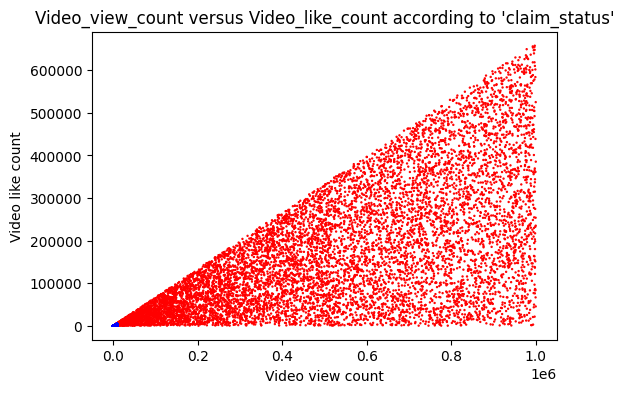

In [328]:
# Create a scatterplot of `video_view_count` versus `video_like_count` according to 'claim_status'
plt.figure(figsize=(6,4))
color = ["r" if value == "claim" else "b" for value in data["claim_status"].dropna() ]
plt.scatter(data["video_view_count"].dropna(), data["video_like_count"].dropna(), s=0.5, c=color)

plt.xlabel("Video view count")
plt.ylabel("Video like count")
plt.title("Video_view_count versus Video_like_count according to 'claim_status'");


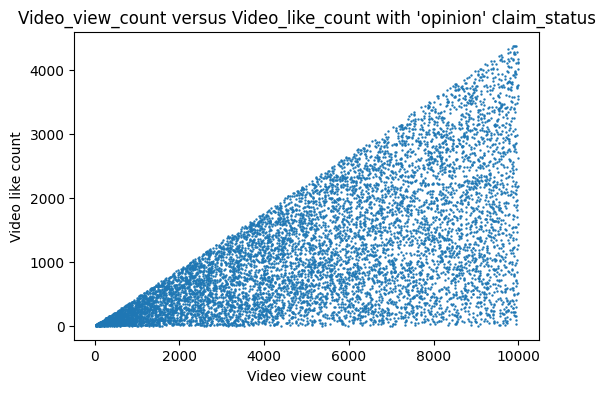

In [329]:
# Create a scatterplot of ``video_view_count` versus `video_like_count` for opinions only
# opinion
data_to_plot_6 = data[["claim_status", "video_view_count", "video_like_count"]].dropna()
data_to_plot_6 = data_to_plot_6[data_to_plot_6["claim_status"] == "opinion"]

plt.figure(figsize=(6,4))
plt.scatter(data_to_plot_6["video_view_count"], data_to_plot_6["video_like_count"], s=0.5)

plt.xlabel("Video view count")
plt.ylabel("Video like count")
plt.title("Video_view_count versus Video_like_count with 'opinion' claim_status");


You can do a scatterplot in Tableau Public as well, which can be easier to manipulate and present.

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 5a. Results and evaluation**

Having built visualizations in Tableau and in Python, what have you learned about the dataset? What other questions have your visualizations uncovered that you should pursue?

***Pro tip:*** Put yourself in your client's perspective, what would they want to know?

Use the following code cells to pursue any additional EDA. Also use the space to make sure your visualizations are clean, easily understandable, and accessible.

***Ask yourself:*** Did you consider color, contrast, emphasis, and labeling?


I have learned ....

    I checked the dataset and identified outliers for number of variables. I understood variables' data distributions   
    I checked dataset for missing data  
    I started analysis correlation between differen variables, particularly between the claim_status variable and

My other questions are ....

    I want to further investigate if any particular features related only to  claims or only to opinions. Also, I want to consider other variables that might be helpful in understanding the data      

My client would likely want to know ...

    My client would want to know the assumptions we made regarding what data might be predictive of claim_status.


### **Task 5b. Conclusion**
*Make it professional and presentable*

You have visualized the data you need to share with the director now. Remember, the goal of a data visualization is for an audience member to glean the information on the chart in mere seconds.

*Questions to ask yourself for reflection:*
Why is it important to conduct Exploratory Data Analysis? What other visuals could you create?


EDA is important because ...

    Trough EDA we detect missing data, understand values distribution, outliers and make better understandig if dataset is sufficient for purpuse of the current project. 

    We also get better understanding of interactions between different variables and which variables gas greater impact on our goals.


Visualizations helped me understand ..

    If the variable has outliers, variable distribution and correlation between different outliers